# Mediciones de corriente continua

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy.optimize import curve_fit
import pandas as pd

#### Clase Medición

In [2]:
class Medicion(object):
    
    """
    Documentacion de la clase Medicion
    """
    
    def __init__(self):
        self.lectura_resistencia = np.NaN
        self.unidad_resistencia = np.NaN
        self.escala_resistencia = np.NaN
        self.lectura_amperimetro = np.NaN
        self.unidad_amperimetro = np.NaN
        self.escala_amperimetro = np.NaN   
        self.lectura_voltimetro = np.NaN
        self.unidad_voltimetro = np.NaN
        self.escala_voltimetro = np.NaN
        self.error_amperimetro = np.NaN
        self.error_voltimetro = np.NaN
        self.parametros = np.NaN
        self.matriz_var = np.NaN
        self.error_resistencia = np.NaN

    
    #funcion que me permite cargar los datos, se puede usar despues Medicion.cargar_resistencia(ponervalores)
    def cargar_resistencia(self, valores, unidad, escala):
        
        self.lectura_resistencia = valores
        self.unidad_resistencia = unidad
        self.escala_resistencia = escala
    
    def cargar_corriente(self, valores, unidad, escala):
        
        self.lectura_amperimetro = valores
        self.unidad_amperimetro = unidad
        self.escala_amperimetro = escala
        
    def cargar_voltaje(self, valores, unidad, escala):
        
        self.lectura_voltimetro = valores
        self.unidad_voltimetro = unidad
        self.escala_voltimetro = escala
        
    def cargar_error(self, eAmp, eVol, eRes):
        self.error_amperimetro = eAmp
        self.error_voltimetro = eVol
        self.error_resistencia = eRes
        
    def gen_df(self):
        
        self.datos = pd.DataFrame({
                'voltaje': self.lectura_voltimetro, 
                'corriente': self.lectura_amperimetro,
                'resistencia': self.lectura_resistencia})
        
    def cargar_parametros(self, param, var):
        self.parametros = param
        self.matriz_var = var
        

### Incerteza del multímetro

In [3]:
# x es la fracción porcentual (ver en manual)
# n es un número natural (ver en manual)
# dms es el dígito menos significativo (pantalla del multímetro)
# L es la lectura del multímetro (pantalla del multímetro)

def error_mult(x, L, n, dms):
    
    error = (x*L) + (n*dms)
    
    return error
    

## Medición resistencia interna del amperímetro

El amperímetro posee una resistencia interna muy pequeña, y depende de la escala del instrumento. Entonces se realizaron 3 mediciones, una en escala de 2mA, otra en escala de 20mA y otra en escala de 200mA.

#### Con escala de 2mA

In [5]:
med1 = Medicion()
med1.cargar_corriente([1.950,1.812,1.691,1.636,1.538,1.450,1.330,1.181,1.104,1.016,0.941,0.876,0.819,0.770,0.726,0.669,0.627,0.559,0.504,0.458], 'mA', '2mA')
med1.cargar_voltaje([195.0,181.1,169.0,163.6,153.7,144.9,133.5,118.0,110.4,101.5,94.0,87.5,81.5,76.9,72.6,66.6,62.7,55.8,50.3,45.8], 'mV', '200mV')

errorA = list()
for i in range(len(med1.lectura_amperimetro)):
    errorA.append(error_mult(0.8/100, med1.lectura_amperimetro[i], 1, 0.001))

med1.cargar_error(errorA, np.NaN, np.NaN)

Defino una función lineal común:

In [6]:
def lineal(x, A, b):
    y = A*x + b
    return(y)

Ajuste:

In [7]:
params, var = curve_fit(lineal, med1.lectura_amperimetro, med1.lectura_voltimetro, p0=[1,0], sigma = med1.error_amperimetro)
med1.cargar_parametros(params, var)
print('Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es: ', 
      med1.parametros[0],  ', y la ordenada al origen es:', med1.parametros[1], '. Los errores asociados son: ', 
      np.sqrt(np.diag(med1.matriz_var)))

Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es:  100.04831944781702 , y la ordenada al origen es: -0.12088341676401236 . Los errores asociados son:  [0.09323704 0.08027086]


Gráfico:

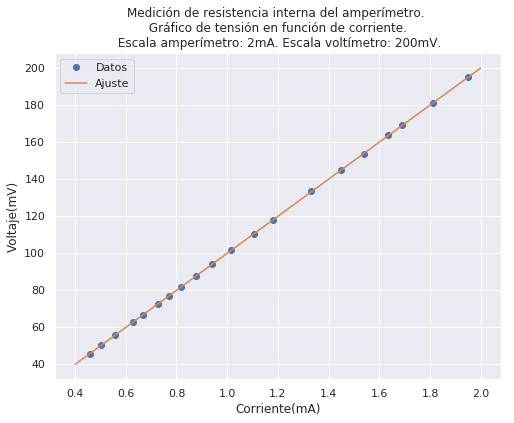

In [8]:
fig = plt.figure(figsize = [8,6])
plt.plot(med1.lectura_amperimetro, med1.lectura_voltimetro, 'o', label = 'Datos')
plt.plot(np.linspace(0.4, 2.0, 1000), lineal(np.linspace(0.4, 2.0, 1000), *med1.parametros), label = 'Ajuste')
plt.title('Medición de resistencia interna del amperímetro. \n Gráfico de tensión en función de corriente. \n Escala amperímetro: 2mA. Escala voltímetro: 200mV.')
plt.xlabel('Corriente(mA)')
plt.ylabel('Voltaje(mV)')
plt.legend()

#### Con escala de 20mA

In [10]:
med2 = Medicion()
med2.cargar_corriente([5.57,5.02,4.57,4.19,3.87,3.36,2.66,6.2,7.12,8.27,9.87,16.10,17.78,19.12], 'mA', '20mA')
med2.cargar_voltaje([56.6,51,46.4,42.6,39.3,34.2,27.0,63.5,72.3,84.0,100.3,163.6,180.7,194.2], 'mV', '200mV')

errorA = list()
for i in range(len(med2.lectura_amperimetro)):
    errorA.append(error_mult(0.8/100, med2.lectura_amperimetro[i], 1, 0.01))
    
med2.cargar_error(errorA, np.NaN, np.NaN)

In [11]:
params, var = curve_fit(lineal, med2.lectura_amperimetro, med2.lectura_voltimetro, p0=[1,0], sigma = med2.error_amperimetro)
med2.cargar_parametros(params, var)
print('Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es: ', 
      med2.parametros[0],  ', y la ordenada al origen es:', med2.parametros[1], '. Los errores asociados son: ', 
      np.sqrt(np.diag(med2.matriz_var)))

Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es:  10.165303078013077 , y la ordenada al origen es: 0.003620760359263467 . Los errores asociados son:  [0.0130171  0.07142382]


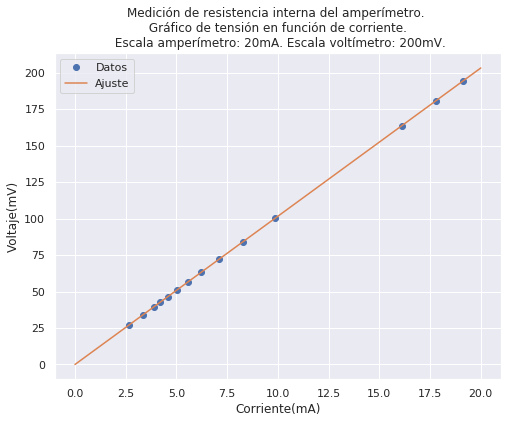

In [18]:
fig = plt.figure(figsize = [8,6])
plt.plot(med2.lectura_amperimetro, med2.lectura_voltimetro, 'o', label = 'Datos')
plt.plot(np.linspace(0, 20.0, 1000), lineal(np.linspace(0, 20.0, 1000), *med2.parametros), label = 'Ajuste')
plt.title('Medición de resistencia interna del amperímetro. \n Gráfico de tensión en función de corriente. \n Escala amperímetro: 20mA. Escala voltímetro: 200mV.')
plt.xlabel('Corriente(mA)')
plt.ylabel('Voltaje(mV)')
plt.legend()

#### Con escala de 200mA

In [15]:
med3 = Medicion()
med3.cargar_corriente([55.3,62.1,70.7,82.0,97.8,121.0], 'mA', '200mA')
med3.cargar_voltaje([63.7,71.4,81.3,94.3,112.4,138.3], 'mV', '200mV')

errorA = list()
for i in range(len(med3.lectura_amperimetro)):
    errorA.append(error_mult(0.8/100, med3.lectura_amperimetro[i], 1, 0.1))
    
med3.cargar_error(errorA, np.NaN, np.NaN)

In [16]:
params, var = curve_fit(lineal, med3.lectura_amperimetro, med3.lectura_voltimetro, p0=[1,0], sigma = med3.error_amperimetro)
med3.cargar_parametros(params, var)
print('Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es: ', 
      med3.parametros[0],  ', y la ordenada al origen es:', med3.parametros[1], '. Los errores asociados son: ', 
      np.sqrt(np.diag(med3.matriz_var)))

Según el ajuste lineal realizado, la pendiente (y por lo tanto la resistencia del amperímetro) es:  1.1398822251900407 , y la ordenada al origen es: 0.6905048340497466 . Los errores asociados son:  [0.00346091 0.25916208]


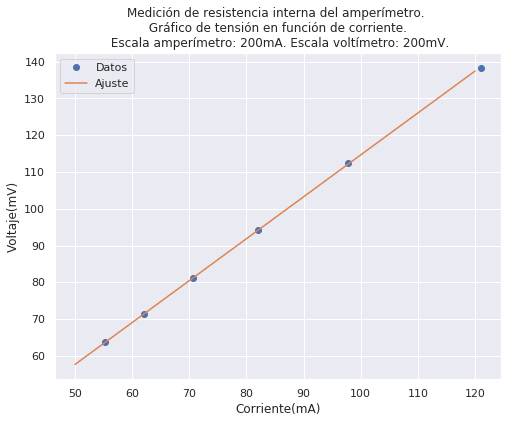

In [20]:
fig = plt.figure(figsize = [8,6])
plt.plot(med3.lectura_amperimetro, med3.lectura_voltimetro, 'o', label = 'Datos')
plt.plot(np.linspace(50, 120, 1000), lineal(np.linspace(50, 120, 1000), *med3.parametros), label = 'Ajuste')
plt.title('Medición de resistencia interna del amperímetro. \n Gráfico de tensión en función de corriente. \n Escala amperímetro: 200mA. Escala voltímetro: 200mV.')
plt.xlabel('Corriente(mA)')
plt.ylabel('Voltaje(mV)')
plt.legend()

## Teorema de Thevenin

Defino una función para el voltaje según el teorema de Thevenin:

In [29]:
def Vc(ic, Eeqt, Reqt):
    Vc = Eeqt - ic*Reqt
    return Vc

Cargo los datos:

In [30]:
medTh = Medicion()
medTh.cargar_voltaje([4.04,4.27,4.49,4.88,5.21,5.51,5.77,6.00,6.22,6.74,7.35,7.77,8.08,8.32,8.51,8.66,8.79,3.21,2.88,2.52,2.12,1.68,1.18,0.62], 'V', '20V')
medTh.cargar_resistencia([1000,1100,1200,1400,1600,1800,2000,2200,2400,3000,4000,5000,6000,7000,8000,9000,10000,700,600,500,400,300,200,100], 'ohm', np.NaN)

corriente = []
for i in range(len(medTh.lectura_voltimetro)):
    corriente.append(medTh.lectura_voltimetro[i]/medTh.lectura_resistencia[i])
    
medTh.cargar_corriente(corriente, 'A', np.NaN)

Hago el ajuste:

In [31]:
params, var = curve_fit(Vc, medTh.lectura_amperimetro, medTh.lectura_voltimetro, p0=[0,1])
medTh.cargar_parametros(params, var)
print('Según el ajuste lineal realizado, la ordenada al origen (y por lo tanto el valor de la fuente equivalente de Thevenin) es: ', 
      medTh.parametros[0],  ' y la pendiente (correspondiente a la resistencia equivalente de Thevenin multiplicado por -1) es: ', medTh.parametros[1], '.')

Según el ajuste lineal realizado, la ordenada al origen (y por lo tanto el valor de la fuente equivalente de Thevenin) es:  10.135903924234354  y la pendiente (correspondiente a la resistencia equivalente de Thevenin multiplicado por -1) es:  1515.091959864503 .


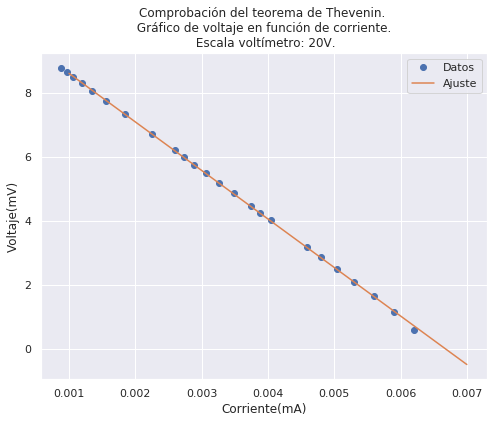

In [32]:
fig = plt.figure(figsize = [8,6])
plt.plot(medTh.lectura_amperimetro, medTh.lectura_voltimetro, 'o', label = 'Datos')
plt.plot(np.linspace(0.001, 0.007, 1000), Vc(np.linspace(0.001, 0.007, 1000), *medTh.parametros), label = 'Ajuste')
plt.title('Comprobación del teorema de Thevenin. \n Gráfico de voltaje en función de corriente. \n Escala voltímetro: 20V.')
plt.xlabel('Corriente(mA)')
plt.ylabel('Voltaje(mV)')
plt.legend()

## Teorema de Norton

Defino una función para la corriente según el teorema de Norton:

In [33]:
def Ic(vc, A, ieqN):
    corriente = ieqN - vc*A
    return corriente

Cargo los datos:

In [34]:
medN = Medicion()
medN.cargar_voltaje([4.04,4.27,4.49,4.88,5.21,5.51,5.77,6.00,6.22,6.74,7.35,7.77,8.08,8.32,8.51,8.66,8.79,3.21,2.88,2.52,2.12,1.68,1.18,0.62], 'V', '20V')
medN.cargar_resistencia([1000,1100,1200,1400,1600,1800,2000,2200,2400,3000,4000,5000,6000,7000,8000,9000,10000,700,600,500,400,300,200,100], 'ohm', np.NaN)

corriente = []
for i in range(len(medN.lectura_voltimetro)):
    corriente.append(medN.lectura_voltimetro[i]/medN.lectura_resistencia[i])
    
medN.cargar_corriente(corriente, 'A', np.NaN)

Ajuste:

In [35]:
params, var = curve_fit(Ic, medN.lectura_voltimetro, medN.lectura_amperimetro, p0=[1,0])
medN.cargar_parametros(params, var)
print('Según el ajuste lineal realizado, la ordenada al origen (y por lo tanto el valor de la corriente equivalente de Norton) es: ', 
      medN.parametros[1],  ' y la pendiente es: ', medN.parametros[0], '. Por lo tanto el valor de la resistencia equivalente es ', 1/medN.parametros[0])

Según el ajuste lineal realizado, la ordenada al origen (y por lo tanto el valor de la corriente equivalente de Norton) es:  0.0066894671292203525  y la pendiente es:  0.0006599312625555177 . Por lo tanto el valor de la resistencia equivalente es  1515.3093310469944


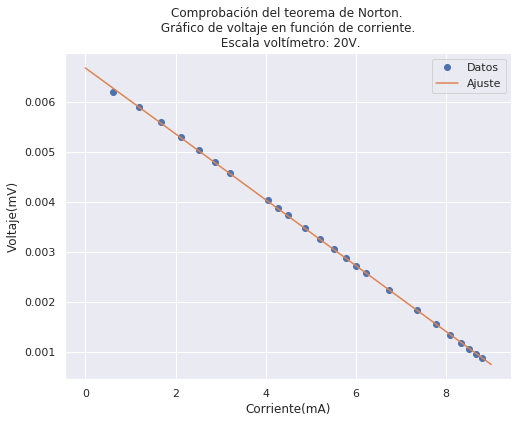

In [36]:
fig = plt.figure(figsize = [8,6])
plt.plot(medN.lectura_voltimetro, medN.lectura_amperimetro, 'o', label = 'Datos')
plt.plot(np.linspace(0, 9, 1000), Ic(np.linspace(0, 9, 1000), *medN.parametros), label = 'Ajuste')
plt.title('Comprobación del teorema de Norton. \n Gráfico de voltaje en función de corriente. \n Escala voltímetro: 20V.')
plt.xlabel('Corriente(mA)')
plt.ylabel('Voltaje(mV)')
plt.legend()

## Máxima transferencia de potencia y la resistencia interna de la fuente

Defino la función de potencia:

In [37]:
# R es la resistencia, I es la corriente
def potencia (R, I):
    P = (I**2) *R
    return(P)

In [38]:
medpot = Medicion()
medpot.cargar_corriente([33.6,31.5,29.7,28.1,26.6,25.3,24.0,23.0,22.0,21.1,20.2,26.4,26.3,26.2,26,25.9,25.8,25.6,25.5,25.4,25.1,25,24.9,24.8,24.6,24.5,24.4,24.3,24.2,24.1,19.5,18.4,17.4,16.3,14.5,12.7,11.3,10.2,9.2,8.5,7.3,6.3,5.6,5.1,4.6,4.2,3.9,3.6,3.2,2.8,2.4,1.9,1.4,1.6], 'mA', '200mA')
medpot.cargar_resistencia([50,60,70,80,90,100,110,120,130,140,150,91,92,93,94,95,96,97,98,99,101,102,103,104,105,106,107,108,109,110,160,175,190,210,250,300,350,400,450,500,600,700,800,900,1000,1100,1200,1300,1500,1700,2000,2500,3500,3000], 'ohm', np.NaN)

P = []
for i in range(len(medpot.lectura_amperimetro)):
    P.append(potencia(medpot.lectura_resistencia[i], medpot.lectura_amperimetro[i]/1000))

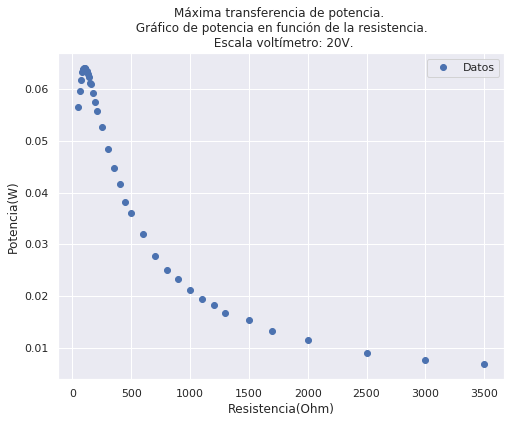

In [39]:
fig = plt.figure(figsize = [8,6])
plt.plot(medpot.lectura_resistencia, P, 'o', label = 'Datos')
plt.title('Máxima transferencia de potencia. \n Gráfico de potencia en función de la resistencia. \n Escala voltímetro: 20V.')
plt.xlabel('Resistencia(Ohm)')
plt.ylabel('Potencia(W)')
plt.legend()

Mi intención sería hacer un ajuste cuadrático, pero es muy difícil definir la forma de esta cuadrática. Sé que el valor de la resistencia interna de la fuente estará alrededor del punto de resistencia donde la potencia es máxima, entonces tomo una selección de puntos:

In [40]:
max(P)

0.064009

In [41]:
seleccionP = []
seleccionR = []

for i in range(len(P)):
    if P[i] > 0.0615: # 0.061 es un número cercano al máximo
        seleccionP.append(P[i])
        seleccionR.append(medpot.lectura_resistencia[i])

Grafico la seleccion, ahora sí que parece más una cuadrática:

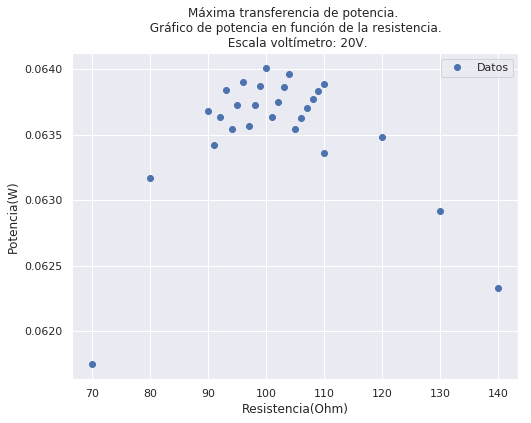

In [42]:
fig = plt.figure(figsize = [8,6])
plt.plot(seleccionR, seleccionP, 'o', label = 'Datos')
plt.title('Máxima transferencia de potencia. \n Gráfico de potencia en función de la resistencia. \n Escala voltímetro: 20V.')
plt.xlabel('Resistencia(Ohm)')
plt.ylabel('Potencia(W)')
plt.legend()

Defino una función cuadrática genérica:

In [43]:
def cuad(x,a,b,c):
    C = ((x+c)**2)*a + b
    return C

Ajusto:

In [62]:
params, var = curve_fit(cuad, seleccionR, seleccionP, p0=[1, 1, -100], bounds = ([-1, 0, -102],[10, 1, 10]))
medpot.cargar_parametros(params, var)
print('Según el ajuste cuadrático realizado, los parámetros a(c+x)**2 + b, a, b y c son:', medpot.parametros)

Según el ajuste cuadrático realizado, los parámetros a(c+x)**2 + b, a, b y c son: [-1.27766309e-06  6.37727525e-02 -1.02000000e+02]


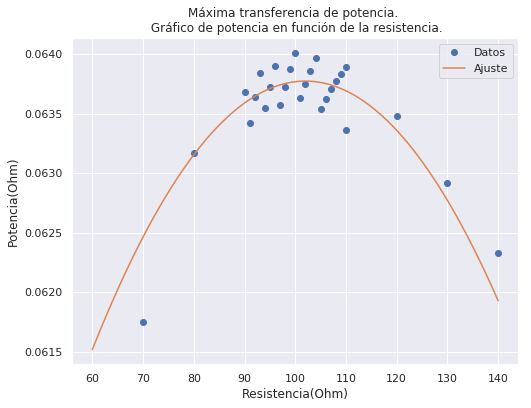

In [63]:
fig = plt.figure(figsize = [8,6])
plt.plot(seleccionR, seleccionP, 'o', label = 'Datos')
plt.plot(np.linspace(60, 140, 50000), cuad(np.linspace(60, 140, 50000), *medpot.parametros), label = 'Ajuste')
plt.title('Máxima transferencia de potencia. \n Gráfico de potencia en función de la resistencia.')
plt.xlabel('Resistencia(Ohm)')
plt.ylabel('Potencia(Ohm)')
plt.legend()

El máximo de potencia está asociado a la resistencia total del circuito

In [64]:
resistencia_ajuste = np.linspace(60, 150, 50000)
potencia_ajuste = cuad(np.linspace(60, 150, 50000), *medpot.parametros)
A = np.where(potencia_ajuste == np.amax(potencia_ajuste))[0]
print('Según el ajuste realizado, la resistencia a la que se transfiere la máxima potencia es ',resistencia_ajuste[A])


Según el ajuste realizado, la resistencia a la que se transfiere la máxima potencia es  [102.00024]


Pero vamos a ver lo que pasó durante la experiencia. El valor de la resistencia a la cual se encontró el máximo de potencia fue:

In [65]:
medpot.lectura_resistencia[P.index(max(P))]

100

Como la resistencia limitadora R es $R= 100 \Omega$ y $R_{ajuste} = R + r_{a} + r_{i}$ ($r_{a}$ es la resistencia interna del amperímetro, que en este caso no es despreciable porque se midió usando la escala de 200mA), entonces:

In [66]:
r_a = med3.parametros[1]
r_i = resistencia_ajuste[A] - 100 - r_a
print('El valor de la resistencia interna de la fuente es ri = ', r_i)

El valor de la resistencia interna de la fuente es ri =  [1.30973517]
